In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
sns.set_context('notebook')
#!pip install selenium
# geckodriver.exe file download  
import os
import time
from selenium import webdriver

#### Import clustered dataset 


In [54]:
data_clustered = pd.read_csv("data\\part-00000-e1527fde-02a0-47c5-9daa-dbbdb2994948-c000.csv", sep = ";")

In [55]:
data_clustered.head(n=10)

,address,latitude,longitude,name,number,cluster
0,Lower River Tce / Ellis St,-27.482279,153.028723,122 - LOWER RIVER TCE / ELLIS ST,122,0
1,Main St / Darragh St,-27.470590,153.036046,91 - MAIN ST / DARRAGH ST,91,2
2,Sydney St Ferry Terminal / Park,-27.474531,153.042728,88 - SYDNEY ST FERRY TERMINAL / PARK,88,3
3,Browne St / James St,-27.461881,153.046986,75 - BROWNE ST / JAMES ST,75,3
4,Kurilpa Point / Montague Rd,-27.469658,153.016696,98 - KURILPA POINT / MONTAGUE RD,98,2
5,Montague Rd / Skinner St,-27.481720,153.004360,109 - MONTAGUE RD / SKINNER ST,109,1
6,Macquarie St / Guyatt Park,-27.493626,153.001482,149 - MACQUARIE ST / GUYATT PARK,149,1
7,Bi-centennial Bike Way / Lang Pde,-27.476076,153.002459,139 - BI-CENTENNIAL BIKE WAY / LANG PDE,139,1
8,Sir William McGregor Dr / Sir Fred Schonnell,-27.493963,153.011938,24 - SIR WILLIAM MCGREGOR DR / SIR FRED SCHONNELL,24,0
9,Vulture St / Tribune St,-27.482197,153.020894,117 - VULTURE ST / TRIBUNE ST,117,0


In [56]:
### count du nombre d'adresse au nveau de chaque cluster
data_clustered.cluster.value_counts()

2    50
0    29
1    27
4    25
3    18
Name: cluster, dtype: int64

#### Map Generation  

In [57]:
#obtenir la carte à partir de la position de la première ligne
print(data_clustered.longitude[0])
print(data_clustered.latitude[0])
position = [-27.482279,153.028723]
#fixer le paramètre zoom_start de façon qu'on pourrait visualiser toutes les adresses.(Brisbane)
mp = folium.Map(location=position, zoom_start=14)

153.02872299999999
-27.482279


In [58]:
mp

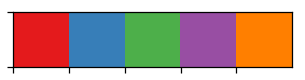

In [59]:
#fixer les couleurs relatives au clusters
n_clusters = 5
colors = sns.color_palette('Set1', n_clusters)
sns.palplot(colors)
hex_colors = colors.as_hex()

#### Longitude , Latitude , clusters 

In [60]:
###affecter chaque position avrec le cluster adéquat pour un point de la map 
for _,row in data_clustered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=row['name'],
        color=hex_colors[row['cluster']],
        fill=True,
        fill_opacity=0.5,
        fill_color=hex_colors[row['cluster']]
    ).add_to(mp)

In [24]:
#les clusters transformés à des popup sur la carte, visualisés enregistré dans un HTML file
#mp.save("Brisbane-clustered-n_clusters-{}.html".format(n_clusters))

#### HTML and Screenshot generation 

In [67]:

 
delay=5
 
#enregistrer la carte comme étant HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
mp.save(fn)
 
#tmpurl

In [73]:
#Open a browser window...
browser = webdriver.Firefox(executable_path=r'geckodriver.exe')
#..afficher la carte ...
browser.get(tmpurl)
#accorder un temps pour l'affichage de la carte 
time.sleep(delay)

In [74]:
#Grab the screenshot
browser.save_screenshot('map.png')
#Close the browser
browser.quit()